In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
%matplotlib inline
import numpy as np
from rnn.arch import RNN
from vae.arch import VAE
import matplotlib.pyplot as plt
from gym.utils import seeding
from IPython import display
import time
from model import make_model

import config

np.set_printoptions(precision=4, suppress = True)

In [13]:
def get_mixture_coef(z_pred):

    log_pi, mu, log_sigma = np.split(z_pred, 3, 1)
    log_pi = log_pi - np.log(np.sum(np.exp(log_pi), axis = 1, keepdims = True))

    return log_pi, mu, log_sigma

def get_pi_idx(x, pdf):
    # samples from a categorial distribution
    N = pdf.size
    accumulate = 0
    for i in range(0, N):
        accumulate += pdf[i]
        if (accumulate >= x):
            return i
    random_value = np.random.randint(N)
    #print('error with sampling ensemble, returning random', random_value)
    return random_value

def sample_z(mu, log_sigma):
    z =  mu + (np.exp(log_sigma)) * np.random.randn(*log_sigma.shape) 
    return z


def get_z_from_rnn_output(y_pred):
    HIDDEN_UNITS = 256
    GAUSSIAN_MIXTURES = 5
    Z_DIM = 32
    d = GAUSSIAN_MIXTURES * Z_DIM

    z_pred = y_pred[:(3*d)]
    rew_pred = y_pred[-1]

    z_pred = np.reshape(z_pred, [-1, GAUSSIAN_MIXTURES * 3])

    log_pi, mu, log_sigma = get_mixture_coef(z_pred)

    chosen_log_pi = np.zeros(Z_DIM)
    chosen_mu = np.zeros(Z_DIM)
    chosen_log_sigma = np.zeros(Z_DIM)

    # adjust temperatures
    logmix2 = np.copy(log_pi)
    logmix2 -= logmix2.max()
    logmix2 = np.exp(logmix2)
    logmix2 /= logmix2.sum(axis=1).reshape(Z_DIM, 1)


    for j in range(Z_DIM):
        idx = get_pi_idx(np.random.rand(), logmix2[j])
        chosen_log_pi[j] = idx
        chosen_mu[j] = mu[j, idx]
        chosen_log_sigma[j] = log_sigma[j,idx]

    next_z = sample_z(chosen_mu, chosen_log_sigma)

    # print(next_z)
    # print(rew_pred)
    if rew_pred > 0:
        next_reward = 1
    else:
        next_reward = 0
        
    return next_z, next_reward, chosen_mu

In [14]:
rollout_files = np.load('./data/rollout/10586732.npz') 
obs_file = rollout_files['obs']
action_file = rollout_files['action']
reward_file = rollout_files['reward']
done_file = rollout_files['done']

series_files = np.load('./data/series/10586732.npz') 
mu_file = series_files['mu']
log_var_file = series_files['log_var']
action_2_file = series_files['action']
reward_2_file = series_files['reward']
done_2_file = series_files['done']


In [17]:

model = make_model()
model.make_env('car_racing')
model.load_model('./controller/car_racing.cma.4.16.current.json')

dream_env = make_model()
dream_env.make_env('car_racing_dream', model = make_model())


loading file ./controller/car_racing.cma.4.16.current.json


In [18]:
action = [0,1,0]
reward = 0
total_reward = 0
total_dream_reward = 0
t = 0

model.reset()

obs = model.env.reset()
dream_obs = dream_env.env.reset()

model_out = model.env.render('rgb_array')
dream_env.env.render('rgb_array')

actions0 = []
actions1 = []
actions2 = []

Time 0
Action [1.     0.8967 0.    ]
Predicted New Reward 1
New reward 6.992198581560284
Total reward 6.992198581560284
Dream reward 1
Dream total reward 1


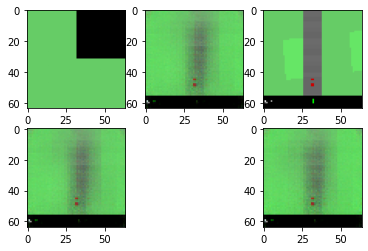

Time 1
Action [0.9991 0.7957 0.    ]
Predicted New Reward 0
New reward -0.09999999999999964
Total reward 6.892198581560284
Dream reward 0
Dream total reward 1


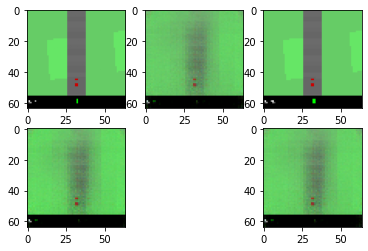

Time 2
Action [1.     0.0008 0.    ]
Predicted New Reward 0
New reward -0.09999999999999964
Total reward 6.792198581560284
Dream reward 0
Dream total reward 1


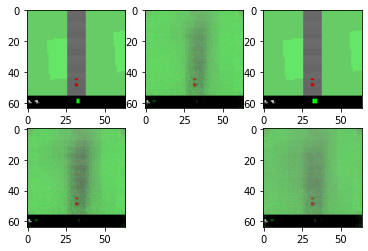

Time 3
Action [0.9064 0.1092 0.    ]
Predicted New Reward 0
New reward -0.09999999999999964
Total reward 6.692198581560285
Dream reward 0
Dream total reward 1


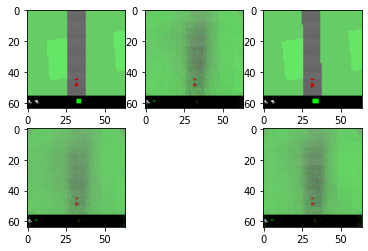

Time 4
Action [1.     0.9984 0.    ]
Predicted New Reward 0
New reward -0.09999999999999964
Total reward 6.592198581560285
Dream reward 0
Dream total reward 1


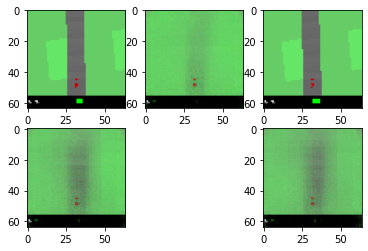

Time 5
Action [0.9909 0.9808 0.    ]
Predicted New Reward 0
New reward -0.09999999999999964
Total reward 6.492198581560285
Dream reward 0
Dream total reward 1


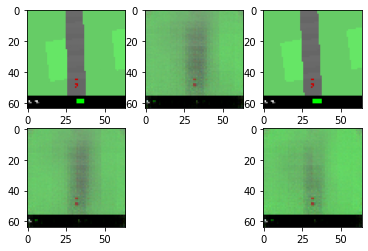

Time 6
Action [0.9998 1.     0.    ]
Predicted New Reward 0
New reward -0.09999999999999964
Total reward 6.392198581560286
Dream reward 0
Dream total reward 1


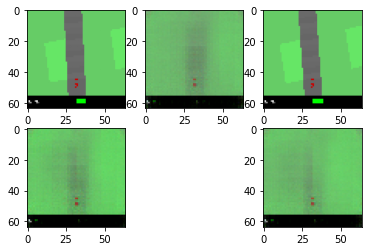

Time 7
Action [1. 1. 0.]
Predicted New Reward 0
New reward -0.09999999999999964
Total reward 6.292198581560286
Dream reward 0
Dream total reward 1


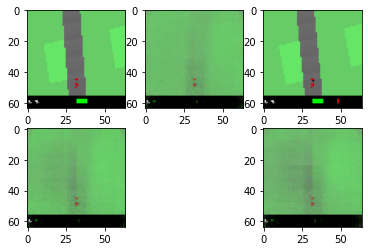

Time 8
Action [0.9932 1.     0.    ]
Predicted New Reward 0
New reward -0.09999999999999964
Total reward 6.1921985815602865
Dream reward 0
Dream total reward 1


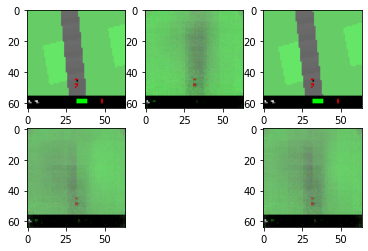

Time 9
Action [0.8665 1.     0.    ]
Predicted New Reward 0
New reward -0.09999999999999964
Total reward 6.092198581560287
Dream reward 0
Dream total reward 1


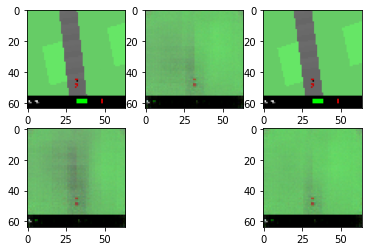

Time 10
Action [-0.9933  1.      0.    ]
Predicted New Reward 1
New reward -0.09999999999999964
Total reward 5.992198581560287
Dream reward 1
Dream total reward 2


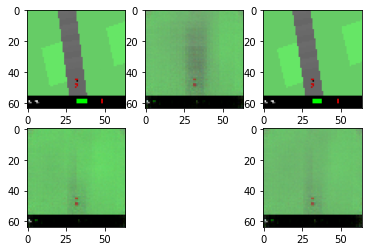

Time 11
Action [-1.      0.9998  0.    ]
Predicted New Reward 1
New reward 3.4460992907801424
Total reward 9.43829787234043
Dream reward 0
Dream total reward 2


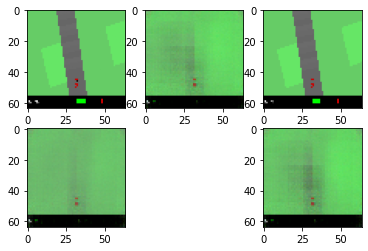

Time 12
Action [-1.      0.0357  0.    ]
Predicted New Reward 0
New reward -0.09999999999999964
Total reward 9.33829787234043
Dream reward 0
Dream total reward 2


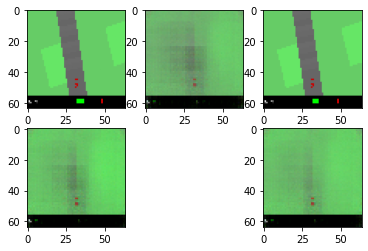

Time 13
Action [-0.9862  1.      0.    ]
Predicted New Reward 0
New reward -0.09999999999999964
Total reward 9.23829787234043
Dream reward 0
Dream total reward 2


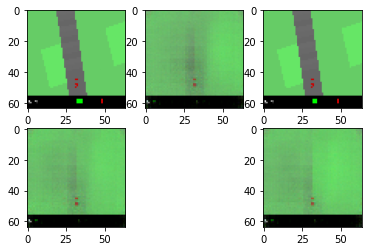

Time 14
Action [-1.      0.9435  0.    ]
Predicted New Reward 0
New reward -0.09999999999999964
Total reward 9.13829787234043
Dream reward 0
Dream total reward 2


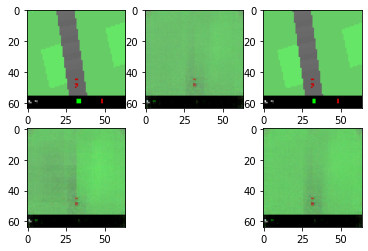

Time 15
Action [0.9299 0.9992 0.    ]
Predicted New Reward 0
New reward -0.09999999999999964
Total reward 9.038297872340431
Dream reward 0
Dream total reward 2


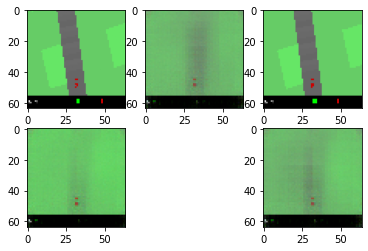

Time 16
Action [-0.9813  1.      0.    ]
Predicted New Reward 0
New reward -0.09999999999999964
Total reward 8.938297872340431
Dream reward 0
Dream total reward 2


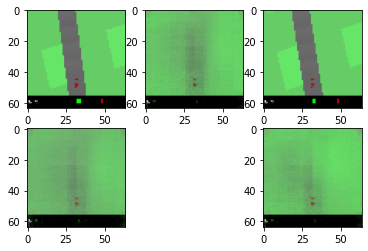

Time 17
Action [0.4974 0.9998 0.    ]
Predicted New Reward 0
New reward -0.09999999999999964
Total reward 8.838297872340432
Dream reward 0
Dream total reward 2


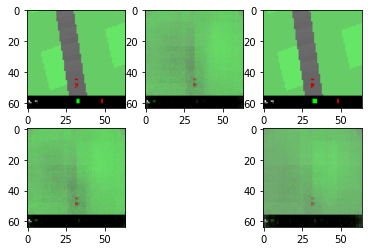

Time 18
Action [0.9968 0.9971 0.    ]
Predicted New Reward 0
New reward -0.09999999999999964
Total reward 8.738297872340432
Dream reward 0
Dream total reward 2


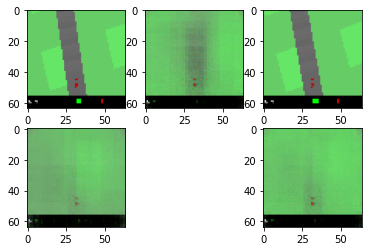

Time 19
Action [-0.1802  1.      0.    ]
Predicted New Reward 0
New reward -0.09999999999999964
Total reward 8.638297872340432
Dream reward 0
Dream total reward 2


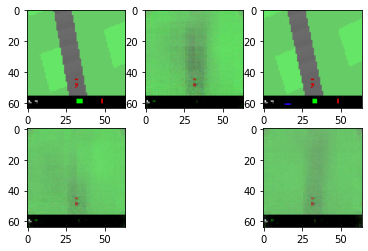

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


Time 20
Action [0.9753 1.     0.    ]
Predicted New Reward 0
New reward -0.09999999999999964
Total reward 8.538297872340433
Dream reward 1
Dream total reward 3


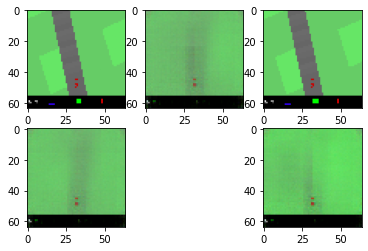

Time 21
Action [-0.9951  1.      0.    ]
Predicted New Reward 1
New reward -0.09999999999999964
Total reward 8.438297872340433
Dream reward 0
Dream total reward 3


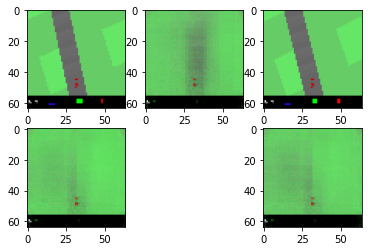

Time 22
Action [-1.      0.9997  0.    ]
Predicted New Reward 1
New reward 3.4460992907801415
Total reward 11.884397163120575
Dream reward 0
Dream total reward 3


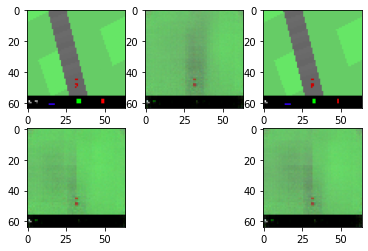

Time 23
Action [-1.      0.3179  0.    ]
Predicted New Reward 0
New reward -0.09999999999999964
Total reward 11.784397163120575
Dream reward 0
Dream total reward 3


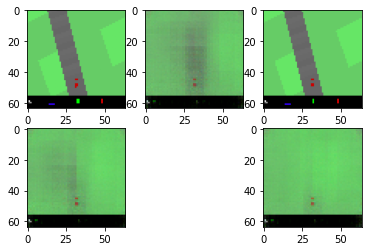

Time 24
Action [0.7626 0.9999 0.    ]
Predicted New Reward 0
New reward -0.09999999999999964
Total reward 11.684397163120575
Dream reward 0
Dream total reward 3


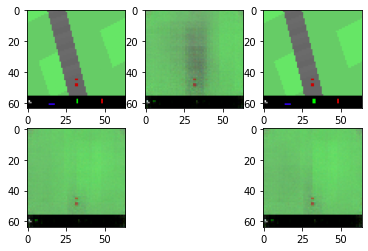

Time 25
Action [-0.9987  1.      0.    ]
Predicted New Reward 0
New reward -0.09999999999999964
Total reward 11.584397163120576
Dream reward 1
Dream total reward 4


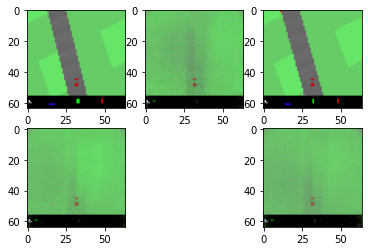

Time 26
Action [-0.9933  0.0019  0.    ]
Predicted New Reward 0
New reward -0.09999999999999964
Total reward 11.484397163120576
Dream reward 0
Dream total reward 4


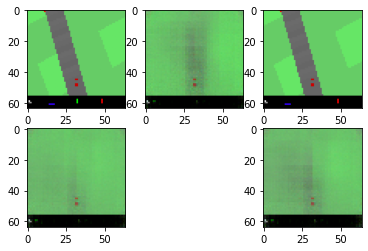

Time 27
Action [-0.1073  0.7569  0.    ]
Predicted New Reward 1
New reward -0.09999999999999964
Total reward 11.384397163120576
Dream reward 0
Dream total reward 4


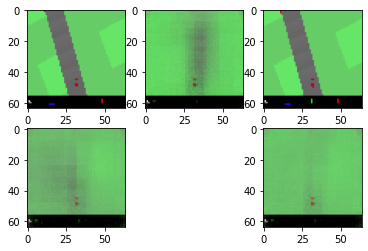

Time 28
Action [-0.7388  0.0179  0.    ]
Predicted New Reward 1
New reward -0.09999999999999964
Total reward 11.284397163120577
Dream reward 0
Dream total reward 4


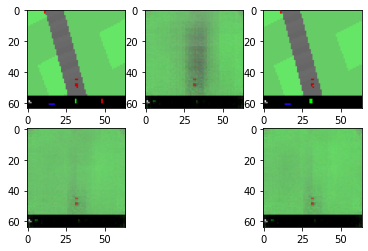

Time 29
Action [-0.7936  0.0658  0.    ]
Predicted New Reward 0
New reward -0.09999999999999964
Total reward 11.184397163120577
Dream reward 0
Dream total reward 4


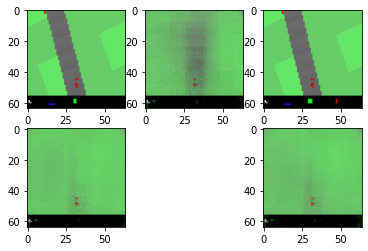

Time 30
Action [0.9997 0.9629 0.    ]
Predicted New Reward 0
New reward 3.4460992907801415
Total reward 14.630496453900719
Dream reward 1
Dream total reward 5


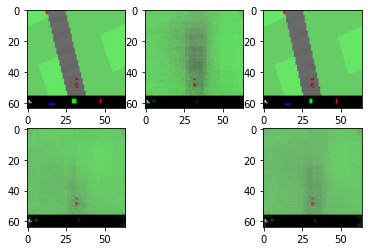

Time 31
Action [-1.      0.1055  0.    ]
Predicted New Reward 0
New reward -0.09999999999999964
Total reward 14.530496453900719
Dream reward 0
Dream total reward 5


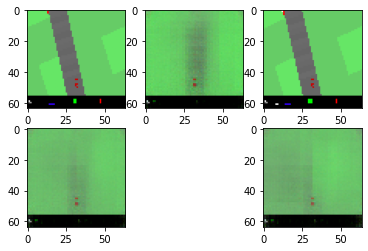

Time 32
Action [0.7129 0.786  0.    ]
Predicted New Reward 0
New reward -0.09999999999999964
Total reward 14.43049645390072
Dream reward 0
Dream total reward 5


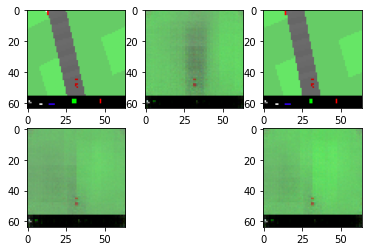

Time 33
Action [0.9999 0.9013 0.    ]
Predicted New Reward 0
New reward -0.09999999999999964
Total reward 14.33049645390072
Dream reward 0
Dream total reward 5


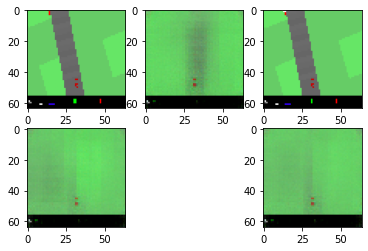

Time 34
Action [0.8532 0.9981 0.    ]
Predicted New Reward 0
New reward -0.09999999999999964
Total reward 14.23049645390072
Dream reward 1
Dream total reward 6


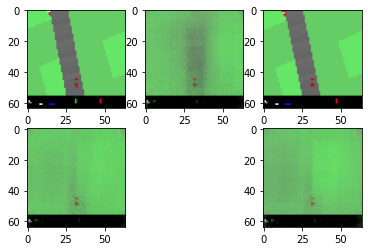

Time 35
Action [0.9969 1.     0.    ]
Predicted New Reward 1
New reward -0.09999999999999964
Total reward 14.13049645390072
Dream reward 0
Dream total reward 6


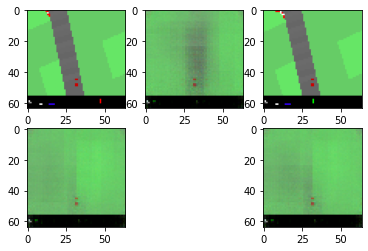

Time 36
Action [-1.      0.9985  0.    ]
Predicted New Reward 1
New reward 3.4460992907801415
Total reward 17.576595744680862
Dream reward 0
Dream total reward 6


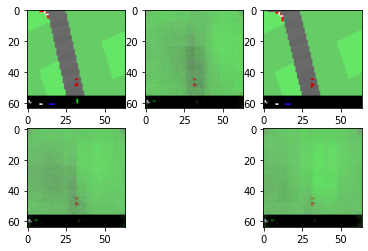

Time 37
Action [-1.      0.9949  0.    ]
Predicted New Reward 0
New reward -0.10000000000000142
Total reward 17.47659574468086
Dream reward 0
Dream total reward 6


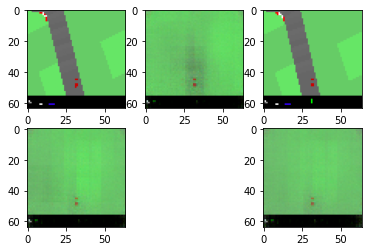

Time 38
Action [-1.      0.1317  0.    ]
Predicted New Reward 0
New reward -0.10000000000000142
Total reward 17.37659574468086
Dream reward 0
Dream total reward 6


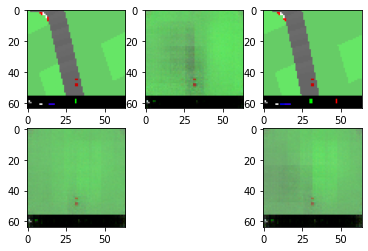

Time 39
Action [-1.      0.9976  0.    ]
Predicted New Reward 0
New reward -0.10000000000000142
Total reward 17.276595744680858
Dream reward 0
Dream total reward 6


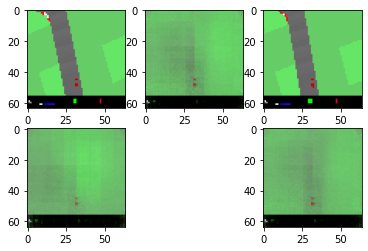

Time 40
Action [-0.9874  0.9781  0.    ]
Predicted New Reward 1
New reward -0.10000000000000142
Total reward 17.176595744680856
Dream reward 0
Dream total reward 6


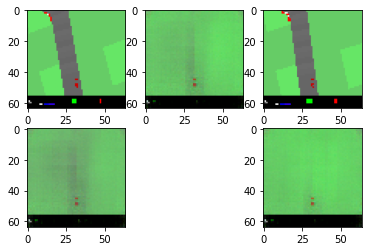

Time 41
Action [0.8197 0.9435 0.    ]
Predicted New Reward 1
New reward -0.10000000000000142
Total reward 17.076595744680855
Dream reward 0
Dream total reward 6


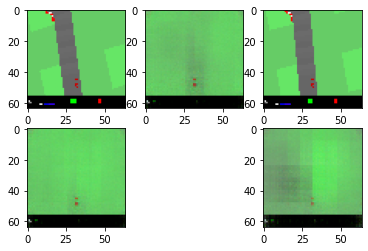

Time 42
Action [-1.      0.0652  0.    ]
Predicted New Reward 0
New reward 3.4460992907801398
Total reward 20.522695035460995
Dream reward 0
Dream total reward 6


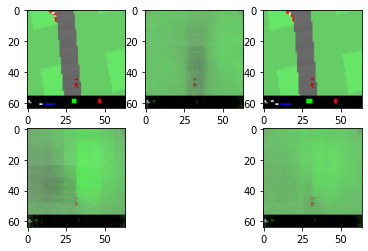

Time 43
Action [-1.      0.2946  0.    ]
Predicted New Reward 0
New reward -0.10000000000000142
Total reward 20.422695035460993
Dream reward 0
Dream total reward 6


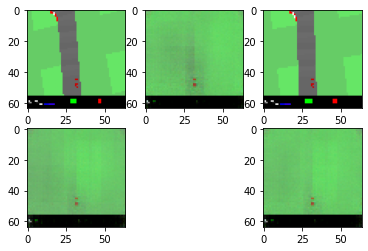

Time 44
Action [-0.8866  0.8107  0.    ]
Predicted New Reward 1
New reward -0.10000000000000142
Total reward 20.322695035460992
Dream reward 0
Dream total reward 6


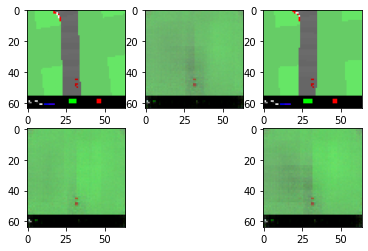

Time 45
Action [0.9998 0.0013 0.    ]
Predicted New Reward 1
New reward -0.10000000000000142
Total reward 20.22269503546099
Dream reward 0
Dream total reward 6


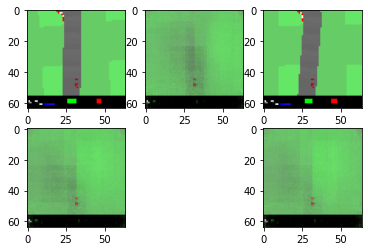

Time 46
Action [0.9999 0.0011 0.    ]
Predicted New Reward 0
New reward -0.10000000000000142
Total reward 20.12269503546099
Dream reward 0
Dream total reward 6


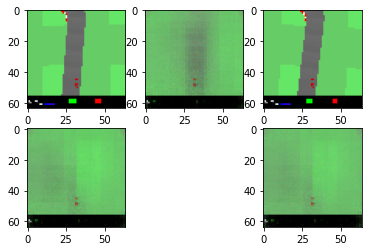

Time 47
Action [-0.9668  0.5322  0.    ]
Predicted New Reward 0
New reward 3.4460992907801398
Total reward 23.56879432624113
Dream reward 0
Dream total reward 6


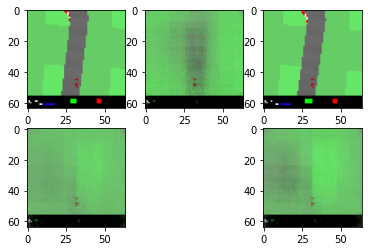

Time 48
Action [0.9997 0.6001 0.    ]
Predicted New Reward 0
New reward -0.10000000000000142
Total reward 23.468794326241127
Dream reward 0
Dream total reward 6


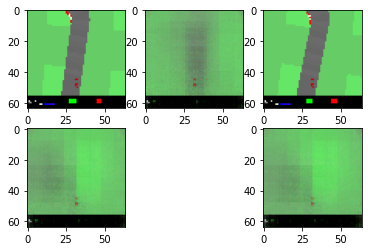

Time 49
Action [1.     0.9998 0.    ]
Predicted New Reward 0
New reward -0.10000000000000142
Total reward 23.368794326241126
Dream reward 0
Dream total reward 6


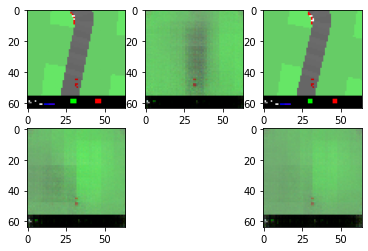

Time 50
Action [0.7814 0.8881 0.    ]
Predicted New Reward 1
New reward -0.10000000000000142
Total reward 23.268794326241125
Dream reward 0
Dream total reward 6


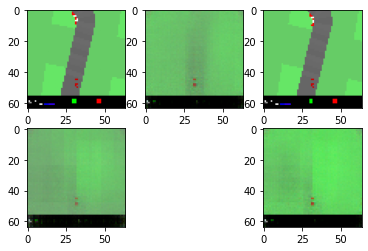

Time 51
Action [0.9868 1.     0.    ]
Predicted New Reward 1
New reward -0.10000000000000142
Total reward 23.168794326241123
Dream reward 0
Dream total reward 6


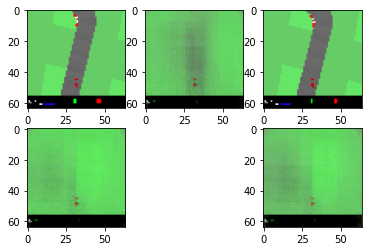

Time 52
Action [1.    0.991 0.   ]
Predicted New Reward 0
New reward 3.4460992907801398
Total reward 26.614893617021263
Dream reward 0
Dream total reward 6


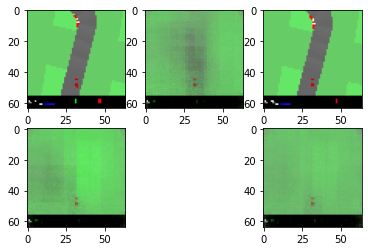

Time 53
Action [-0.1555  0.9902  0.    ]
Predicted New Reward 0
New reward -0.10000000000000142
Total reward 26.51489361702126
Dream reward 0
Dream total reward 6


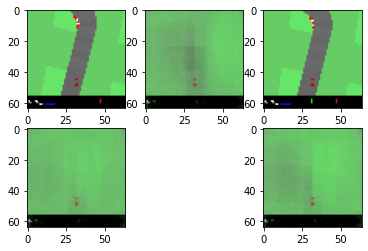

Time 54
Action [0.9729 1.     0.    ]
Predicted New Reward 0
New reward -0.10000000000000142
Total reward 26.41489361702126
Dream reward 0
Dream total reward 6


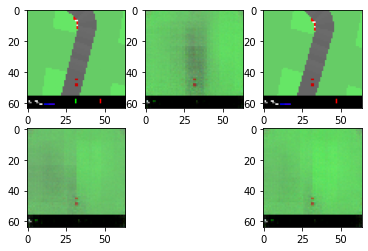

Time 55
Action [0.7131 0.9988 0.    ]
Predicted New Reward 0
New reward -0.10000000000000142
Total reward 26.31489361702126
Dream reward 0
Dream total reward 6


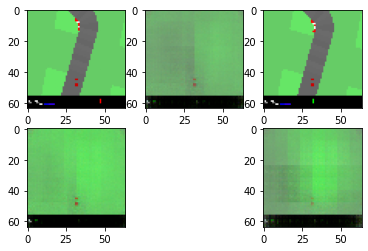

Time 56
Action [0.974 1.    0.   ]
Predicted New Reward 1
New reward -0.10000000000000142
Total reward 26.214893617021257
Dream reward 0
Dream total reward 6


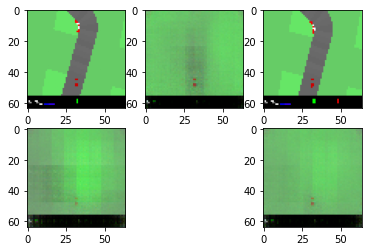

Time 57
Action [1. 1. 0.]
Predicted New Reward 1
New reward 3.4460992907801398
Total reward 29.660992907801397
Dream reward 0
Dream total reward 6


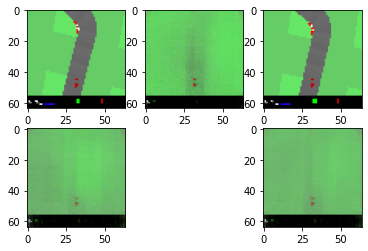

Time 58
Action [-0.95    0.7065  0.    ]
Predicted New Reward 0
New reward -0.10000000000000142
Total reward 29.560992907801396
Dream reward 0
Dream total reward 6


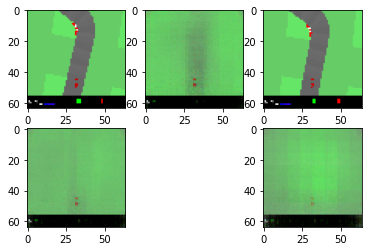

Time 59
Action [0.0588 1.     0.    ]
Predicted New Reward 0
New reward -0.10000000000000142
Total reward 29.460992907801394
Dream reward 0
Dream total reward 6


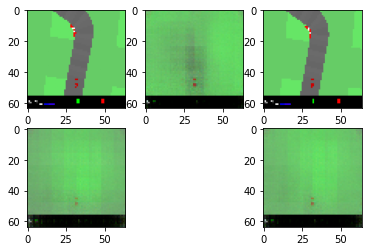

Time 60
Action [0.7341 0.9995 0.    ]
Predicted New Reward 0
New reward -0.10000000000000142
Total reward 29.360992907801393
Dream reward 0
Dream total reward 6


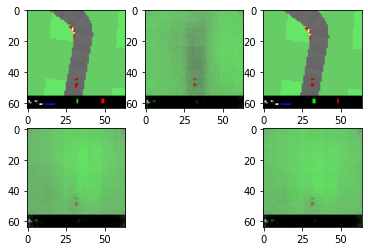

Time 61
Action [-0.3335  0.9169  0.    ]
Predicted New Reward 0
New reward 3.4460992907801433
Total reward 32.807092198581536
Dream reward 0
Dream total reward 6


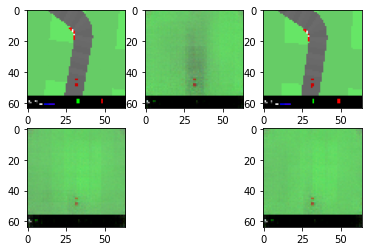

Time 62
Action [-0.7529  0.8749  0.    ]
Predicted New Reward 0
New reward -0.10000000000000142
Total reward 32.707092198581535
Dream reward 0
Dream total reward 6


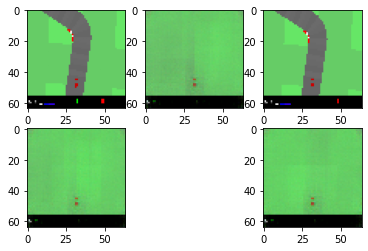

Time 63
Action [-0.9996  0.9666  0.    ]
Predicted New Reward 0
New reward -0.10000000000000142
Total reward 32.60709219858153
Dream reward 0
Dream total reward 6


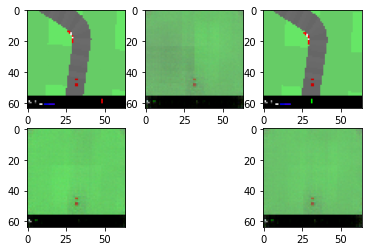

Time 64
Action [0.9995 0.9995 0.    ]
Predicted New Reward 0
New reward -0.10000000000000142
Total reward 32.50709219858153
Dream reward 0
Dream total reward 6


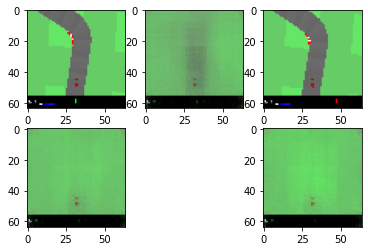

Time 65
Action [1.     0.9919 0.    ]
Predicted New Reward 0
New reward 3.4460992907801398
Total reward 35.95319148936167
Dream reward 0
Dream total reward 6


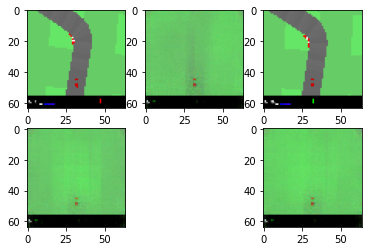

Time 66
Action [0.9481 0.9998 0.    ]
Predicted New Reward 0
New reward -0.10000000000000142
Total reward 35.85319148936167
Dream reward 0
Dream total reward 6


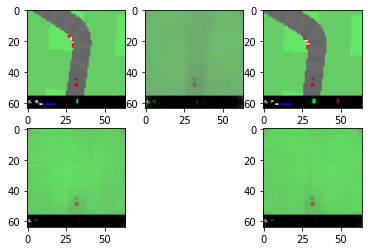

Time 67
Action [0.0069 0.9992 0.    ]
Predicted New Reward 0
New reward -0.10000000000000142
Total reward 35.75319148936167
Dream reward 0
Dream total reward 6


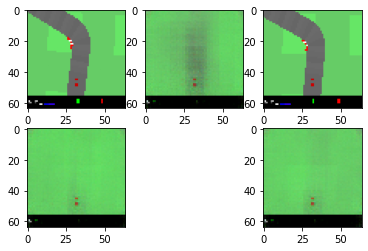

Time 68
Action [0.9979 1.     0.    ]
Predicted New Reward 0
New reward 3.4460992907801398
Total reward 39.19929078014181
Dream reward 0
Dream total reward 6


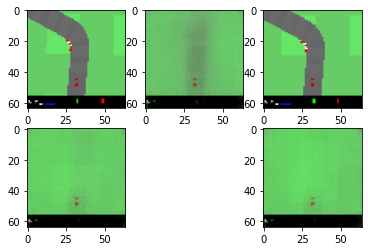

Time 69
Action [-0.9979  0.9949  0.    ]
Predicted New Reward 0
New reward -0.10000000000000142
Total reward 39.09929078014181
Dream reward 0
Dream total reward 6


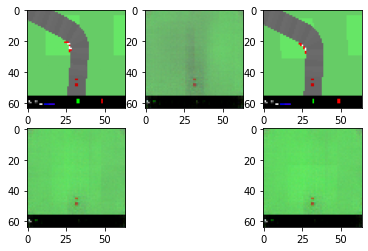

Time 70
Action [-0.9998  1.      0.    ]
Predicted New Reward 0
New reward -0.10000000000000142
Total reward 38.999290780141806
Dream reward 0
Dream total reward 6


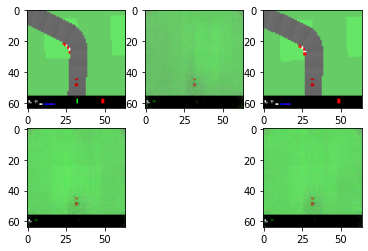

Time 71
Action [0.1324 1.     0.    ]
Predicted New Reward 0
New reward -0.10000000000000142
Total reward 38.899290780141804
Dream reward 0
Dream total reward 6


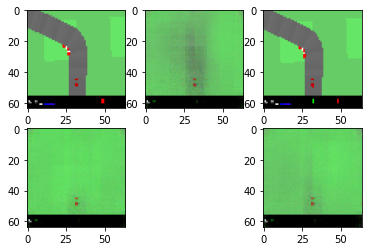

Time 72
Action [0.807  0.9999 0.    ]
Predicted New Reward 1
New reward 3.4460992907801398
Total reward 42.345390070921944
Dream reward 0
Dream total reward 6


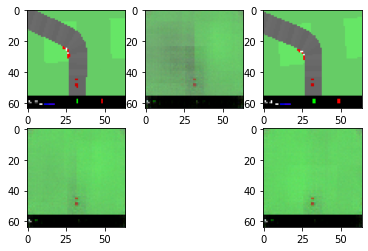

Time 73
Action [-0.9539  1.      0.    ]
Predicted New Reward 0
New reward -0.10000000000000142
Total reward 42.24539007092194
Dream reward 0
Dream total reward 6


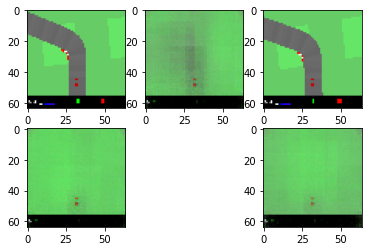

Time 74
Action [-0.9997  0.9999  0.    ]
Predicted New Reward 0
New reward -0.10000000000000142
Total reward 42.14539007092194
Dream reward 0
Dream total reward 6


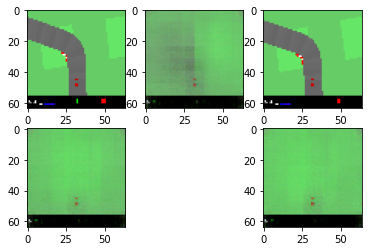

Time 75
Action [-0.9991  0.9981  0.    ]
Predicted New Reward 1
New reward 3.4460992907801398
Total reward 45.59148936170208
Dream reward 0
Dream total reward 6


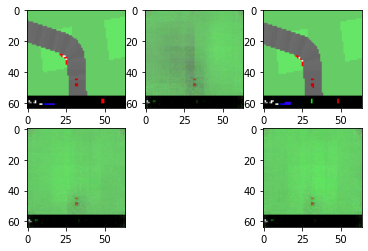

Time 76
Action [-0.9999  0.999   0.    ]
Predicted New Reward 0
New reward -0.10000000000000142
Total reward 45.49148936170208
Dream reward 0
Dream total reward 6


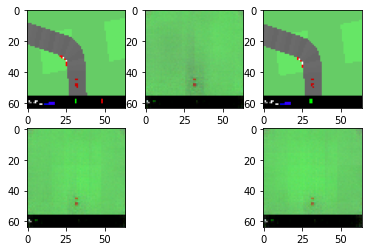

Time 77
Action [-1.      0.0135  0.    ]
Predicted New Reward 0
New reward -0.10000000000000142
Total reward 45.39148936170208
Dream reward 0
Dream total reward 6


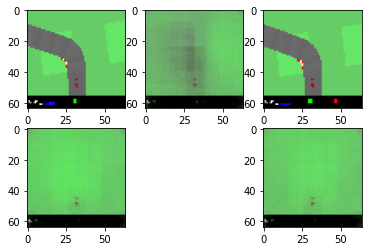

Time 78
Action [0.8093 0.9933 0.    ]
Predicted New Reward 1
New reward 3.4460992907801398
Total reward 48.83758865248222
Dream reward 0
Dream total reward 6


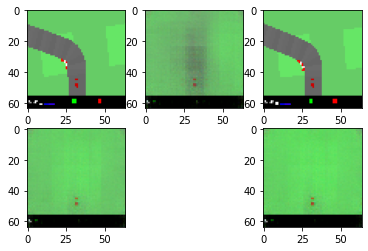

Time 79
Action [-1.      0.7463  0.    ]
Predicted New Reward 0
New reward -0.10000000000000142
Total reward 48.737588652482216
Dream reward 0
Dream total reward 6


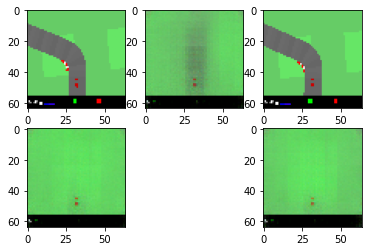

Time 80
Action [-0.8529  0.9991  0.    ]
Predicted New Reward 0
New reward -0.10000000000000142
Total reward 48.637588652482215
Dream reward 0
Dream total reward 6


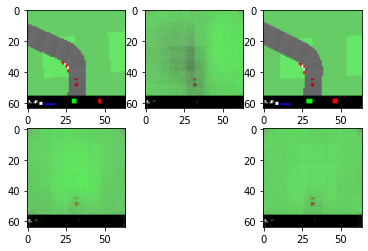

Time 81
Action [-0.9992  0.9994  0.    ]
Predicted New Reward 0
New reward 3.4460992907801398
Total reward 52.083687943262355
Dream reward 0
Dream total reward 6


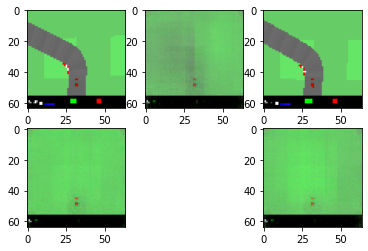

Time 82
Action [-0.5651  0.6198  0.    ]
Predicted New Reward 0
New reward -0.10000000000000142
Total reward 51.98368794326235
Dream reward 0
Dream total reward 6


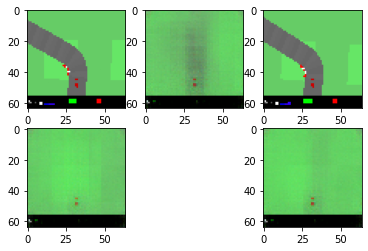

Time 83
Action [-0.9747  0.9186  0.    ]
Predicted New Reward 0
New reward -0.10000000000000142
Total reward 51.88368794326235
Dream reward 0
Dream total reward 6


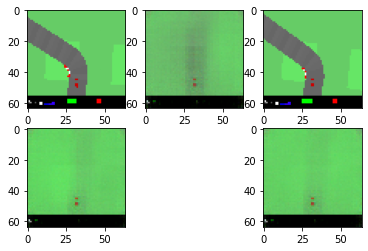

Time 84
Action [-0.7643  0.9959  0.    ]
Predicted New Reward 1
New reward 3.4460992907801398
Total reward 55.32978723404249
Dream reward 0
Dream total reward 6


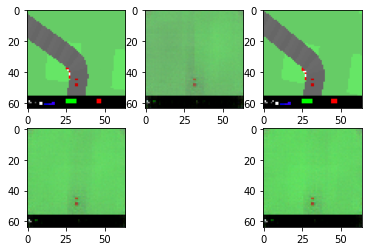

Time 85
Action [-0.2025  0.5802  0.    ]
Predicted New Reward 0
New reward -0.10000000000000142
Total reward 55.22978723404249
Dream reward 0
Dream total reward 6


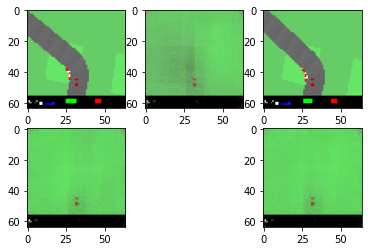

Time 86
Action [0.9489 0.9948 0.    ]
Predicted New Reward 0
New reward 3.4460992907801398
Total reward 58.67588652482263
Dream reward 0
Dream total reward 6


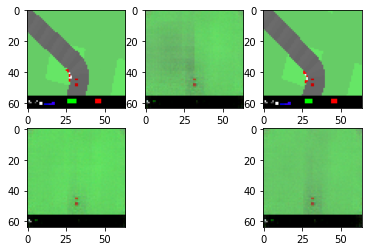

Time 87
Action [-0.9916  0.2026  0.    ]
Predicted New Reward 0
New reward -0.10000000000000142
Total reward 58.57588652482263
Dream reward 0
Dream total reward 6


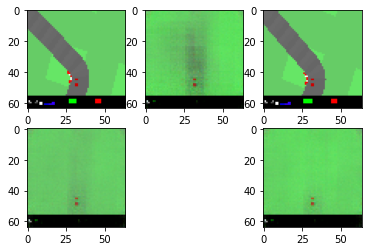

Time 88
Action [0.9999 0.9999 0.    ]
Predicted New Reward 0
New reward -0.10000000000000142
Total reward 58.47588652482263
Dream reward 0
Dream total reward 6


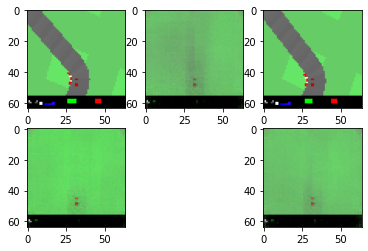

Time 89
Action [-0.7949  0.9989  0.    ]
Predicted New Reward 0
New reward 3.4460992907801398
Total reward 61.92198581560277
Dream reward 0
Dream total reward 6


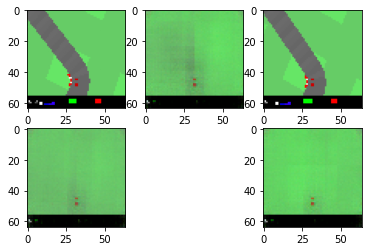

Time 90
Action [0.9999 0.7647 0.    ]
Predicted New Reward 0
New reward 3.446099290780154
Total reward 65.36808510638292
Dream reward 0
Dream total reward 6


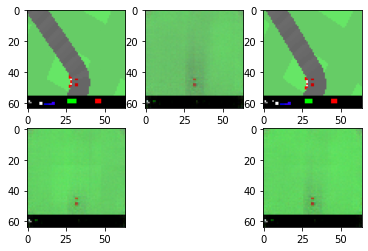

Time 91
Action [0.8692 0.0452 0.    ]
Predicted New Reward 0
New reward -0.09999999999999432
Total reward 65.26808510638293
Dream reward 0
Dream total reward 6


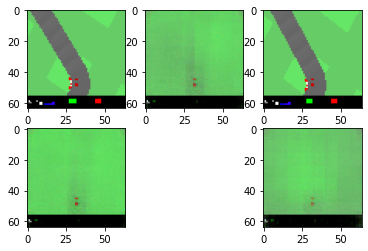

Time 92
Action [0.9601 0.9999 0.    ]
Predicted New Reward 0
New reward 3.446099290780154
Total reward 68.71418439716308
Dream reward 0
Dream total reward 6


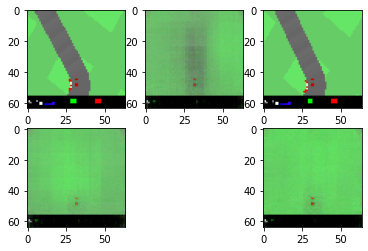

Time 93
Action [0.9015 0.9377 0.    ]
Predicted New Reward 0
New reward -0.09999999999999432
Total reward 68.61418439716309
Dream reward 0
Dream total reward 6


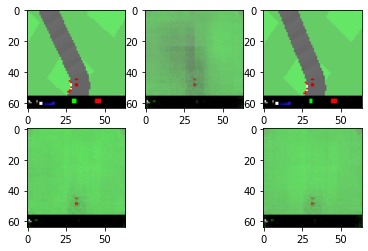

Time 94
Action [-0.7772  0.9998  0.    ]
Predicted New Reward 0
New reward -0.09999999999999432
Total reward 68.51418439716309
Dream reward 0
Dream total reward 6


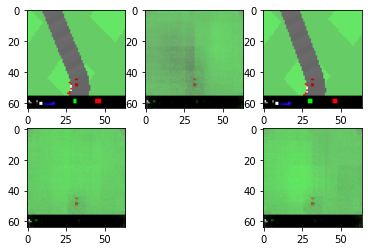

Time 95
Action [0.9222 1.     0.    ]
Predicted New Reward 0
New reward 3.446099290780154
Total reward 71.96028368794325
Dream reward 0
Dream total reward 6


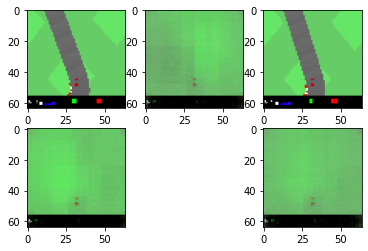

Time 96
Action [-0.9791  0.9999  0.    ]
Predicted New Reward 0
New reward -0.09999999999999432
Total reward 71.86028368794325
Dream reward 0
Dream total reward 6


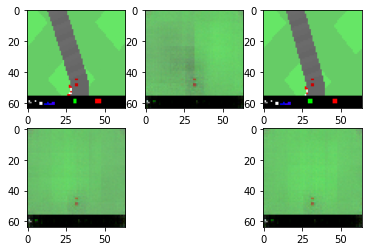

Time 97
Action [0.6203 1.     0.    ]
Predicted New Reward 0
New reward -0.09999999999999432
Total reward 71.76028368794326
Dream reward 0
Dream total reward 6


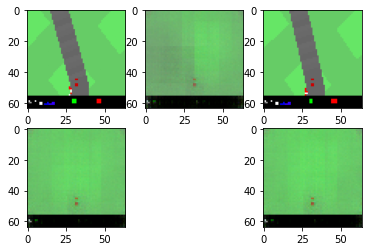

Time 98
Action [0.0879 1.     0.    ]
Predicted New Reward 0
New reward 3.446099290780154
Total reward 75.20638297872341
Dream reward 0
Dream total reward 6


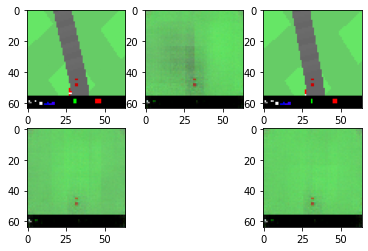

Time 99
Action [-0.9985  0.9998  0.    ]
Predicted New Reward 0
New reward -0.09999999999999432
Total reward 75.10638297872342


In [ ]:
action_direction = []
action_accel = []
action_brake = []

rewards = []
pred_rewards = []
dream_rewards = []

while (t<100):
    
    f = plt.figure()
    
    if obs.shape == model.vae.input_dim: ### running in real environment
        obs = config.adjust_obs(obs)
        reward = config.adjust_reward(reward)
    
    # CURRENT REAL IMAGE
    f.add_subplot(2,3, 1)
    plt.imshow(obs)
    
    # CURRENT DREAM IMAGE
    f.add_subplot(2,3, 4)
    decoded_dream_obs = model.vae.decoder.predict(np.array([dream_obs]))[0]
    plt.imshow(decoded_dream_obs)
    
    
    vae_encoded_obs = model.update(obs, t)

    input_to_rnn = [np.array([[np.concatenate([vae_encoded_obs, action, [reward]])]]),np.array([model.hidden]),np.array([model.cell_values])]
    
    out = model.rnn.forward.predict(input_to_rnn)

    y_pred = out[0][0][0]
    h = out[1][0]
    c = out[2][0]

    model.hidden = h
    model.cell_values = c

    next_z, next_reward, chosen_mu = get_z_from_rnn_output(y_pred)

    recon_next_z = model.vae.decoder.predict(np.array([next_z]))[0]
    
    
    
    #PREDICTED NEXT IMAGE (DECODED FROM RNN)
    f.add_subplot(2,3, 2)
    plt.imshow(recon_next_z)

    controller_obs = np.concatenate([vae_encoded_obs,model.hidden])

    action = model.get_action(controller_obs, t=0, add_noise=0)
#     action = [0,1,0]

    action_direction.append(action[0])
    action_accel.append(action[1])
    action_brake.append(action[2])

    print('Time', t)
    print('Action', action)
    print('Predicted New Reward', next_reward)
    
    pred_rewards.append(next_reward)


    obs, reward, done, _ = model.env.step(action)
    
    
    
    
    # REAL NEXT OBS
    f.add_subplot(2,3, 3)
    plt.imshow(obs)
    total_reward+= reward

    print('New reward', reward)
    print('Total reward', total_reward)
    
    rewards.append(reward)



    dream_obs, dream_reward, dream_done, _ = dream_env.env.step(action)

    
    decoded_dream_obs = model.vae.decoder.predict(np.array([dream_obs]))[0]

    
    # DECODED DREAM NEXT IMAGE
    f.add_subplot(2,3, 6)
    plt.imshow(decoded_dream_obs)
    total_dream_reward+= dream_reward

    print('Dream reward', dream_reward)
    print('Dream total reward', total_dream_reward)
    
    dream_rewards.append(dream_reward)
    

#     display.clear_output(wait=True)
    display.display(plt.gcf()) 
    time.sleep(0.1)
    
    




    t += 1



#     print(action)

In [ ]:
plt.figure(figsize = (15,6))
plt.plot(action_direction)
plt.plot(action_accel)
plt.plot(action_brake)
plt.plot(rewards)
plt.plot(pred_rewards)
# plt.plot(dream_rewards)
plt.legend(['action_direction'
            ,'action_accel'
            ,'action_brake'
            ,'rewards'
            ,'pred_rewards'
#             ,'dream_rewards'
           ])
plt.show()